<a href="https://www.kaggle.com/code/rinichristy/prediction-of-k-medoids-clusters-of-kc-data?scriptVersionId=96144866" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **Classification Prediction of K-medoids clusters of KC House Sale Data**
---------------------------------------------------------
**Part: 5 of King County House Sale**

The aim of this project is to:<br></br>
[Part 1. Explore & Visualize the King County House sale data](https://www.kaggle.com/code/rinichristy/kc-data-exploration-and-visualization); <br>
[Part 2. Statistical Analysis of the data](https://www.kaggle.com/code/rinichristy/statistical-analysis-of-kc-house-sale-data);<br>
[Part 3. Build various regression models to predict the house sale price](https://www.kaggle.com/rinichristy/king-county-house-sale-price-prediction); <br>
[Part 4. K-means, K-medoids and DBSCAN Cluster analysis of KC data](https://www.kaggle.com/code/rinichristy/cluster-analysis-of-kc-data). <br>
[Part 5. Classification Prediction of K-medoids clusters of KC House Sale Data](https://www.kaggle.com/rinichristy/prediction-of-k-medoids-clusters-of-kc-data)

## **Table of Contents**

  * [Data Set Information: King County House Sale Data Set](#Dataset)<br>
  * [Data Exploration](#Explore)<br>
  * [Data Preprocessing](#Preprocessing)<br>
  * [K-medoids Cluster Generation](#kmedoids)<br>
  * [Model Development](#Model)
 

## **Import the required libraries**

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

## **Load the dataset**

In [2]:
df = pd.read_csv("../input/kc-house/kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## **Dataset Information:**<a name ='Dataset'></a>
The King County House sale dataset contains information regarding houses sold during the one year period ranging from May 2014 to May 2015. 

The dataset contains the following information:

| Features |  Description|
|----------------|------------------|
 |Id|            Unique Id for each house sold     |
|Date|         Date of House sale     |
|price |        House sale price     |
|bedrooms|   Number of bedrooms     |
|bathrooms|    Number of bathrooms, where .5 accounts for a bathroom with a toilet but no shower |
|sqft_living|    Square footage of interior living space of the house |
|sqft_lot|           Land area in square feet|
|floors|            Number of floors |
|waterfront|    Label to indicate whether the house was with waterfront or not|
|view|            Labels from 0 to 4 to indicate the view of house.|
|condition|     Labels from 1 to 5 to indicate the condition of the house|
|grade|            Labels from 1 to 13 to indicate the quality levels of construction and design, with 1 to 3 falls in the lowest level, 7 in the average label, and 11-13 in the highest quality level.|
|sqft_above|           Above ground level interior housing space in square feet. |
|sqft_basement| Below ground level interior housing space in square feet. |
|yr_built|            The year of construction of the house ranging from 1900 to 2015     |
|yr_renovated|    The year of last renovation of the house ranging from 1934 to 2015|
|zipcode | Zipcode area of the house|
|lat|   Latitude |
|long|  Longitude |
|sqft_living15| The interior living space in square feet for the nearest 15 neighbors|
|sqft_lot15| The land area in square feet for the nearest 15 neighbors |

## **Data Preprocessing** <a name = 'Preprocessing'></a>

In [3]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


### **Outlier Removal**

In [4]:
df.drop(15870, axis = 0, inplace = True)
# reset index, because a row is droped.
df.reset_index(drop=True, inplace = True)
df.shape

(21612, 21)

### **Checking for Missing Values**

In [5]:
df[df.columns[df.isnull().sum()>0]].isnull().sum()

Series([], dtype: float64)

No missing values detected.

## **K-medoids Cluster Generation**<a name ='kmedoids'></a>

In [6]:
pip install scikit-learn-extra

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 3.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [7]:
df.drop(['date', 'id'], axis = 1, inplace = True)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Clus_dataSet = scaler.fit_transform(df)
Clus_dataSet

array([[-0.86668617, -0.40692359, -1.44745951, ..., -0.30611525,
        -0.94339773, -0.26072358],
       [-0.00567521, -0.40692359,  0.17558163, ..., -0.74637458,
        -0.43272969, -0.18787744],
       [-0.98081575, -1.50829275, -1.44745951, ..., -0.13569228,
         1.07009338, -0.17238527],
       ...,
       [-0.37584455, -1.50829275, -1.77206774, ..., -0.60435544,
        -1.41029422, -0.39414664],
       [-0.38156737, -0.40692359,  0.50018986, ...,  1.02886466,
        -0.84126412, -0.42051628],
       [-0.58585659, -1.50829275, -1.77206774, ..., -0.60435544,
        -1.41029422, -0.41795257]])

In [8]:
from sklearn_extra.cluster import KMedoids
kmedoids = KMedoids(n_clusters=3).fit(Clus_dataSet)

In [9]:
df.insert(0, 'kmedoids Cluster Labels', kmedoids.labels_)
df.head()

,kmedoids Cluster Labels,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,1,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,0,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,0,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,2,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### **Normalize Data & Train Test split**

Data Standardization give data zero mean and unit variance (technically should be done after train test split )

In [10]:
X = df.loc[:, df.columns != 'kmedoids Cluster Labels']
X.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [11]:
from sklearn import preprocessing
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-0.86668617, -0.40692359, -1.44745951, -0.97984121, -0.22832648,
        -0.91546593, -0.08717466, -0.3057672 , -0.62914619, -0.55885272,
        -0.73474634, -0.65864212, -0.5449314 , -0.21013346,  1.87013949,
        -0.35252787, -0.30611525, -0.94339773, -0.26072358],
       [-0.00567521, -0.40692359,  0.17558163,  0.53360192, -0.18989137,
         0.93645991, -0.08717466, -0.3057672 , -0.62914619, -0.55885272,
         0.46079706,  0.2451683 , -0.68111108,  4.74656291,  0.87957332,
         1.16160686, -0.74637458, -0.43272969, -0.18787744],
       [-0.98081575, -1.50829275, -1.44745951, -1.42625249, -0.12330593,
        -0.91546593, -0.08717466, -0.3057672 , -0.62914619, -1.40959054,
        -1.22987038, -0.65864212, -1.29391966, -0.21013346, -0.93334967,
         1.28357482, -0.13569228,  1.07009338, -0.17238527],
       [ 0.17409931,  0.69444556,  1.14940631, -0.13057096, -0.2440192 ,
        -0.91546593, -0.08717466, -0.3057672 ,  2.44468843, -0.55885272,
        -0.891

In [12]:
y = df["kmedoids Cluster Labels"]
y.head()

0    1
1    0
2    2
3    0
4    2
Name: kmedoids Cluster Labels, dtype: int64

### **Waffle chart to visualize K-medoids Cluster properties**

In [13]:
pip install pywaffle

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 565.9/565.9 KB 1.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


##### **Number of houses in each Cluster**

In [14]:
Count =  df.groupby(["kmedoids Cluster Labels"], as_index=False).count()[["kmedoids Cluster Labels", "price"]]
Count.columns = ["kmedoids Cluster Labels", "Count"]
Count

,kmedoids Cluster Labels,Count
0,0,6776
1,1,7964
2,2,6872


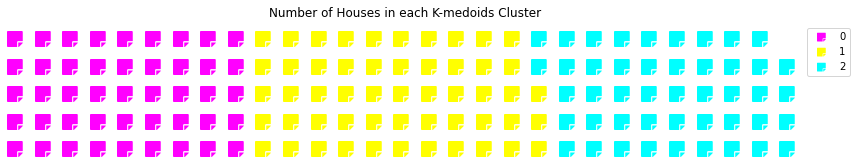

In [15]:
from pywaffle import Waffle
fig = plt.figure(
    FigureClass=Waffle, 
    figsize=(12, 8),
    rows=5, 
    values=list(Count.Count/150), 
    colors=("magenta", "yellow", "cyan"),
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)},
    icons='sticky-note', icon_size=18, 
    icon_legend=True,
    title={'label': 'Number of Houses in each K-medoids Cluster', 'loc': 'center'}, 
    labels=list(Count['kmedoids Cluster Labels']))

##### **Average House Sale price of each cluster**

In [16]:
labels =  df.groupby(["kmedoids Cluster Labels"], as_index=False).mean()[["kmedoids Cluster Labels", "price"]]
labels

,kmedoids Cluster Labels,price
0,0,783367.394923
1,1,327354.355977
2,2,546731.293510


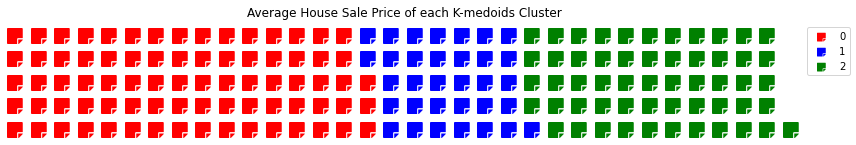

In [17]:
from pywaffle import Waffle
fig = plt.figure(
    FigureClass=Waffle, 
    figsize=(12, 8),
    rows=5, 
    values=list(labels.price/10000), 
    colors=("red", "blue", "green"),
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)},
    icons='sticky-note', icon_size=18, 
    icon_legend=True,
    title={'label': 'Average House Sale Price of each K-medoids Cluster', 'loc': 'center'}, 
    labels=list(labels['kmedoids Cluster Labels']))

## **Model Development for prediction of k-medoids clusters obtained by using k-medoids cluster algorithm on KC House data.**<a name = 'Model'></a>

The following algorithms can be used:
- K Nearest Neighbor(KNN)
- Radius Neighbors
- Decision Tree with entropy criterion
- Decision Tree classifier with gini criterion
- Extra Tree classifier with entropy criterion
- Extra Tree classifier with gini criterion
- Random Forest Classifier
- Support Vector Machine - Linear Kernel 
- Support Vector Machine - rbf Kernel 
- Support Vector Machine - polynomial Kernel 
- Support Vector Machine - Sigmoid Kernel 
- Naive Bayes
- XGBoost Classifier
- CatBoost Classifier
- LogisticRegression_liblinear
- LogisticRegression_newton-cg
- LogisticRegression_lbfgs
- Logistic Regression_saga
- Logistic Regression_sag

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (17289, 19) (17289,)
Test set: (4323, 19) (4323,)


### **The Best Classifier**<a name = 'Classifier'></a>

The least error_rate was  0.0751792736525561 with k= 8


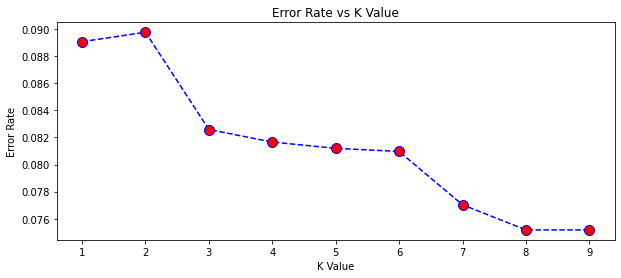

In [19]:
#K Nearest Neighbor(KNN)
from sklearn.neighbors import KNeighborsClassifier
# To find the best k
error_rate = []
for i in range (1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    error_rate.append(np.mean(y_test != y_pred))

plt.figure(figsize = (10,4))
plt.plot(range(1,10), error_rate, color = "blue", ls = "--", marker ="o", markersize = 10, markerfacecolor ="red")
plt.title("Error Rate vs K Value")
plt.ylabel("Error Rate")
plt.xlabel("K Value");
print( "The least error_rate was ", min(error_rate), "with k=", np.argmin(error_rate)+1)

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, precision_score
from sklearn.metrics import log_loss

In [21]:
from sklearn.metrics import f1_score, precision_score
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score
k = 3
Models=[("KNN",KNeighborsClassifier(n_neighbors=k)),
        ("Radius Neighbors",RadiusNeighborsClassifier(radius=100.0)),
        ("Decision Tree (entropy)",DecisionTreeClassifier(max_depth=4, criterion="entropy")),
        ("Decision Tree (gini)",DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, 
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, random_state=None,
            splitter='best')),
        ("Extra Tree (entropy)",ExtraTreeClassifier(criterion="entropy", max_depth = 4)),
        ("Extra Tree (gini)",ExtraTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, 
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, random_state=None,
            splitter='best')),
        ("Random Forest",RandomForestClassifier(n_estimators = 10, criterion = "entropy", random_state = 0)),
        ("SVM_Linear",svm.SVC(kernel='linear')),
        ("SVM_rbf",svm.SVC(kernel='rbf')),
        ("Naive Bayes",GaussianNB()),
        ("XGB", XGBClassifier(learning_rate=0.05, n_estimators=200, objective='binary:logistic', 
                          use_label_encoder=False,  disable_default_eval_metric = True)),
        ("CB", CatBoostClassifier(silent = True)), # To keep verbose silent
        ("LogisticRegression_liblinear",LogisticRegression(C=0.01, solver="liblinear")),
        ("LogisticRegression_newton-cg",LogisticRegression(C=0.1, solver="newton-cg")),
        ("LogisticRegression_lbfgs",LogisticRegression(solver="lbfgs", max_iter=10000)),
        ("LogisticRegression_sag",LogisticRegression(solver="sag", max_iter=10000)),
        ("LogisticRegression_saga",LogisticRegression(solver="saga", max_iter=10000))]

Model_output=[]
for name,model in Models:
    yhat=model.fit(X_train, y_train).predict(X_test)
    Train_set_Accuracy = accuracy_score(y_train, model.predict(X_train))
    F1_score = f1_score(y_test, yhat, average='weighted')
    Accuracy = accuracy_score(y_test, yhat)
    yhat_prob_LL = LogisticRegression(C=0.01, solver="liblinear").fit(X_train,y_train).predict_proba(X_test)
    yhat_prob_N = LogisticRegression(C=0.1, solver="newton-cg").fit(X_train,y_train).predict_proba(X_test)
    yhat_prob_lbfgs = LogisticRegression(solver="lbfgs",  max_iter=10000).fit(X_train,y_train).predict_proba(X_test)
    yhat_prob_sag = LogisticRegression(solver="sag", max_iter=10000).fit(X_train,y_train).predict_proba(X_test)
    yhat_prob_saga = LogisticRegression(solver="saga", max_iter=10000).fit(X_train,y_train).predict_proba(X_test)
    if(name=="LogisticRegression_liblinear"):
        logloss=log_loss(y_test, yhat_prob_LL)
    elif(name=="LogisticRegression_newton-cg"):
        logloss=log_loss(y_test, yhat_prob_N)
    elif(name=="LogisticRegression_lbfgs"):
        logloss=log_loss(y_test, yhat_prob_lbfgs)
    elif(name=="LogisticRegression_sag"):
        logloss=log_loss(y_test, yhat_prob_sag)
    elif(name=="LogisticRegression_saga"):
        logloss=log_loss(y_test, yhat_prob_saga)
    else:
        logloss="NA"
    Model_output.append((name, Train_set_Accuracy, Accuracy, logloss, F1_score))
    final_Report=pd.DataFrame(Model_output, columns=['Algorithm','Train_set_Accuracy', 'Accuracy','Logloss', 'F1-score'])
        
Parameter= [("k", k),("radius_100"),("criterion_entropy"), ("criterion_gini"), ("criterion_entropy"), ("criterion_gini"),
            ("criterion_entropy"),("Linear"),("RBF"), ("GaussianNB"), ("binary:logistic"), ("CatBoost"),
            ("solver_liblinear"), ("solver_newton-cg"),("solver_lbfgs"), ("solver_sag"), ("solver_saga")]
final_Report['Parameter'] = Parameter
final_Report = final_Report[['Algorithm','Parameter', 'Train_set_Accuracy', 'Accuracy','Logloss', 'F1-score']]
final_Report

,Algorithm,Parameter,Train_set_Accuracy,Accuracy,Logloss,F1-score
0,KNN,"(k, 3)",0.962635,0.917418,NA,0.917484
1,Radius Neighbors,radius_100,0.370987,0.358547,NA,0.189255
2,Decision Tree (entropy),criterion_entropy,0.820811,0.821652,NA,0.822791
3,Decision Tree (gini),criterion_gini,0.831858,0.828129,NA,0.828119
4,Extra Tree (entropy),criterion_entropy,0.609694,0.613463,NA,0.604197
5,Extra Tree (gini),criterion_gini,0.831858,0.828129,NA,0.828119
6,Random Forest,criterion_entropy,0.997629,0.939857,NA,0.939820
7,SVM_Linear,Linear,0.995199,0.995142,NA,0.995143
8,SVM_rbf,RBF,0.984614,0.975711,NA,0.975712
9,Naive Bayes,GaussianNB,0.772804,0.774693,NA,0.774337


In [22]:
final_Report = final_Report.sort_values('Accuracy', ascending = False, ignore_index=True)       
final_Report

,Algorithm,Parameter,Train_set_Accuracy,Accuracy,Logloss,F1-score
0,SVM_Linear,Linear,0.995199,0.995142,NA,0.995143
1,LogisticRegression_lbfgs,solver_lbfgs,0.995084,0.993523,0.033512,0.993524
2,LogisticRegression_saga,solver_saga,0.995026,0.993060,0.034525,0.993061
3,LogisticRegression_sag,solver_sag,0.994968,0.993060,0.03402,0.993061
4,LogisticRegression_newton-cg,solver_newton-cg,0.986639,0.984733,0.072713,0.984738
5,SVM_rbf,RBF,0.984614,0.975711,NA,0.975712
6,CB,CatBoost,0.998612,0.974786,NA,0.974783
7,XGB,binary:logistic,0.997339,0.966227,NA,0.966228
8,LogisticRegression_liblinear,solver_liblinear,0.946324,0.941245,0.243758,0.941271
9,Random Forest,criterion_entropy,0.997629,0.939857,NA,0.939820
